# Logistic Regression

## 1. Load Dataset & Preprocess

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pathlib import Path

filePath = Path(r"C:\Users\KIIT0001\Desktop\Coding\AD-L-\L4\Titanic-Dataset.csv")
df = pd.read_csv(filePath)

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

### Basic preprocessing (common for Titanic dataset)

In [6]:
# Select relevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Features & target
X = df.drop('Survived', axis=1)
y = df['Survived']


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_20120\4291569964.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


## 2. Train Logistic Regression Model

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 3. Model Evaluation

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Plot the Sigmoid (Logistic) Function

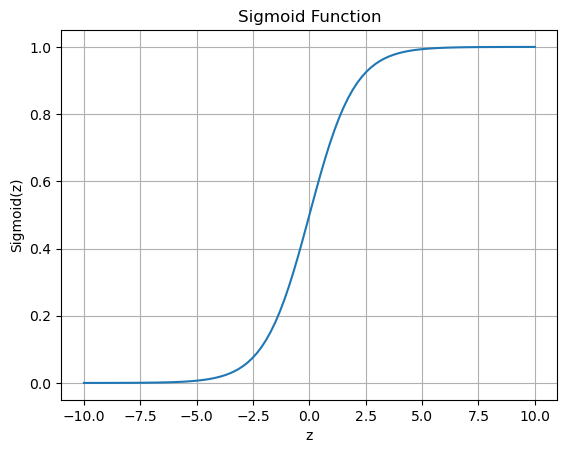

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot
plt.figure()
plt.plot(z, sigmoid_values)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()
